# TSF task no 3 
## EDA on sales dataset 
                                                                                                By :-Arun Singh Negi

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
train=pd.read_csv('SampleSuperstore.csv')

In [3]:
train.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
train.shape

(9994, 13)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [84]:
a=train['City'].unique()
len(a)


531

# EDA on Dataset
## Missing values

In [5]:
train.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

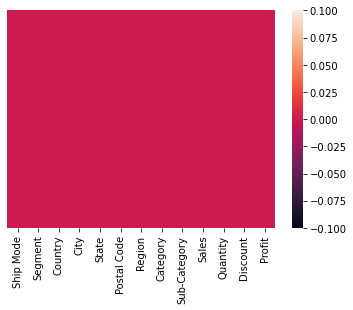

In [8]:
sns.heatmap(train.isnull(),yticklabels=False)

## correlation of data

<AxesSubplot:>

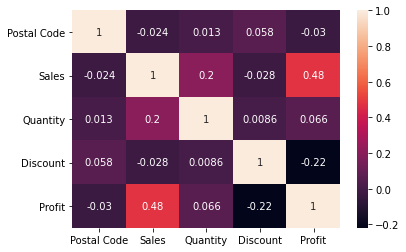

In [14]:
t_corr=train.corr()
sns.heatmap(t_corr,annot=True)

## Region-wise coutplot of item type category

C:\Users\arunn\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

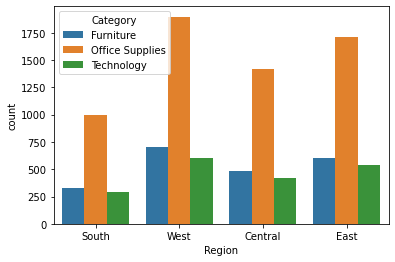

In [19]:
sns.countplot(train['Region'],hue=train['Category'])

## Reginwise profit and sale graph

In [27]:
gr1=train.groupby('Region')['Profit','Sales'].agg('sum')

<ipython-input-27-a6dad1edb192>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr1=train.groupby('Region')['Profit','Sales'].agg('sum')


<AxesSubplot:xlabel='Region'>

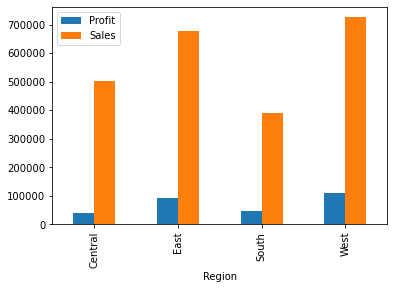

In [28]:
gr1.plot.bar()

## sub-category wise profit and sales of items

<ipython-input-43-3a79b5857efe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr2=train.groupby('Sub-Category')['Profit','Sales'].agg('sum')


<AxesSubplot:xlabel='Sub-Category'>

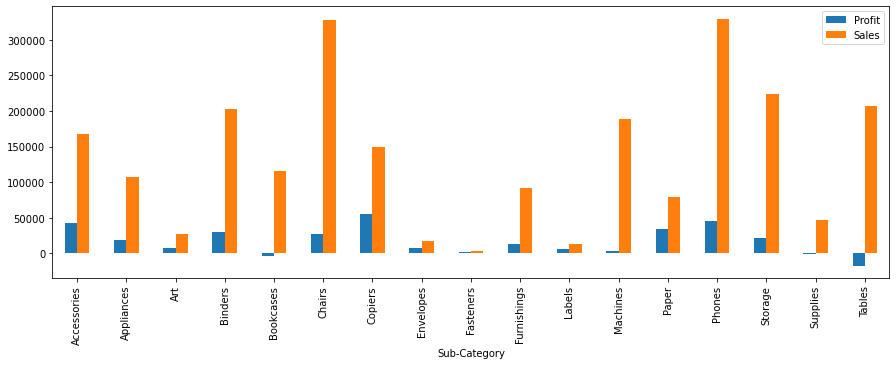

In [43]:
gr2=train.groupby('Sub-Category')['Profit','Sales'].agg('sum')
gr2.plot.bar(figsize=(15,5))

## category-wise percentages of sales 

<AxesSubplot:ylabel='Category'>

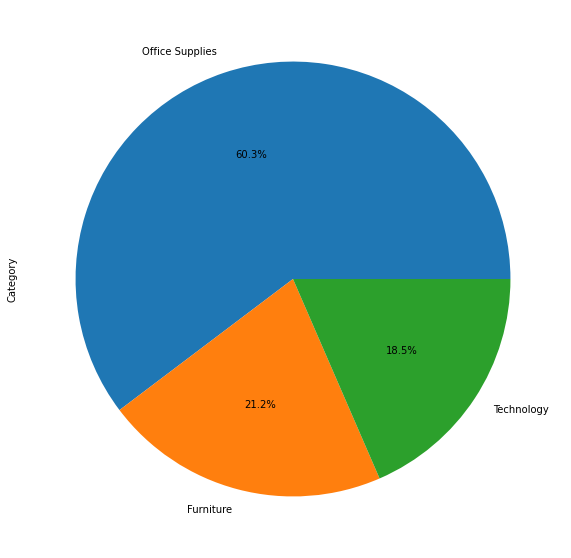

In [81]:
train['Category'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(15,10))

## category wise profit and sale 

<ipython-input-57-462b630fb75d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr4=train.groupby('Category')['Profit','Sales'].agg('sum')


<AxesSubplot:xlabel='Category'>

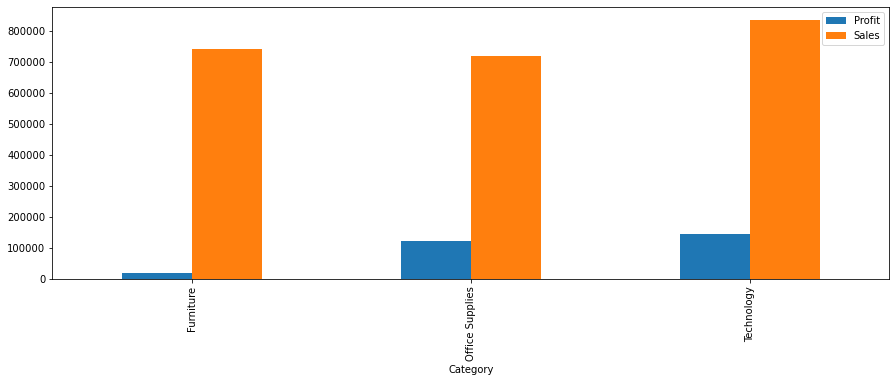

In [57]:
gr4=train.groupby('Category')['Profit','Sales'].agg('sum')
gr4.plot.bar(figsize=(15,5))

## city wise sale

<AxesSubplot:xlabel='City'>

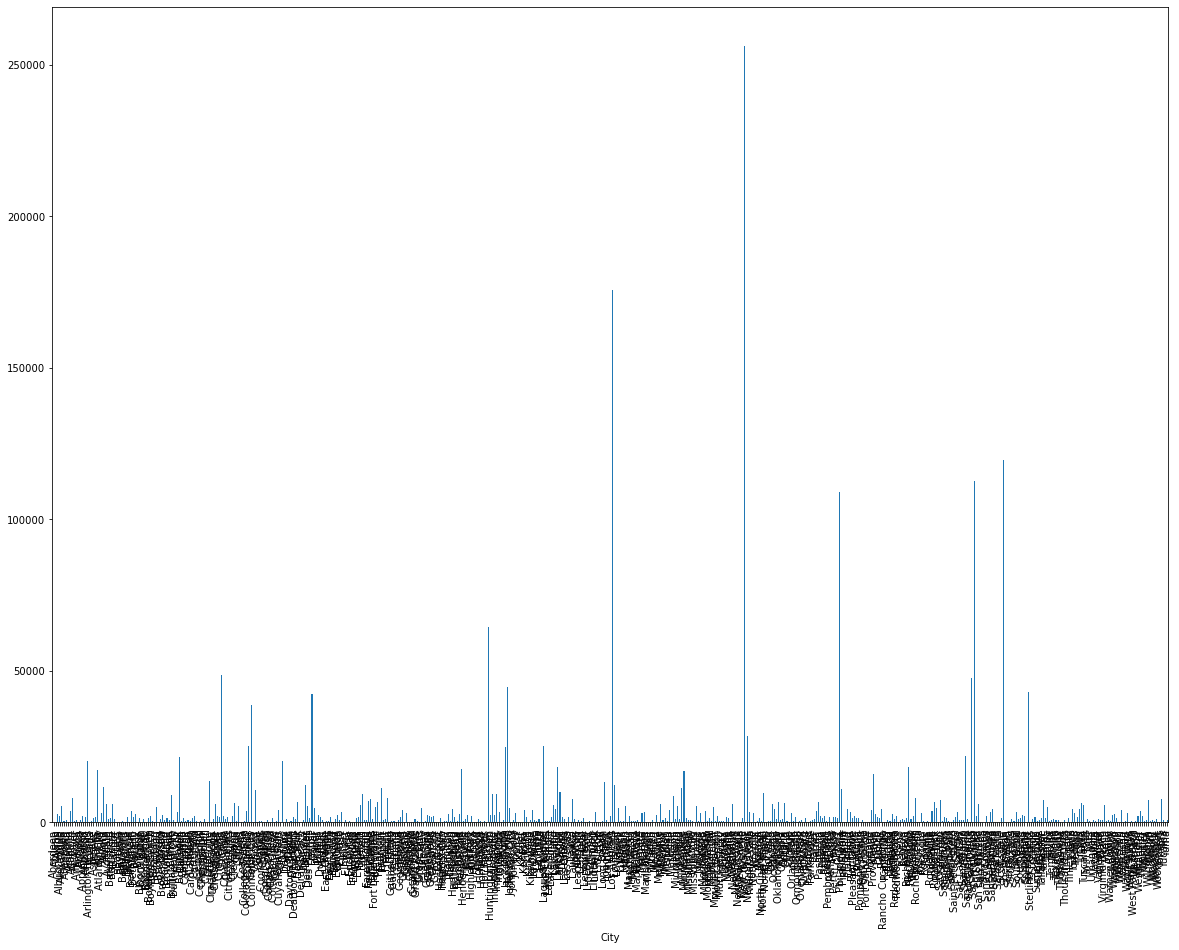

In [83]:
gr3=train.groupby('City')['Sales'].agg('sum')
gr3.plot.bar(figsize=(20,15))

In [56]:
train['City'].value_counts()

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Billings            1
Jupiter             1
Normal              1
Lake Elsinore       1
Citrus Heights      1
Name: City, Length: 531, dtype: int64

## category wise total quantity sold 

<AxesSubplot:xlabel='Category'>

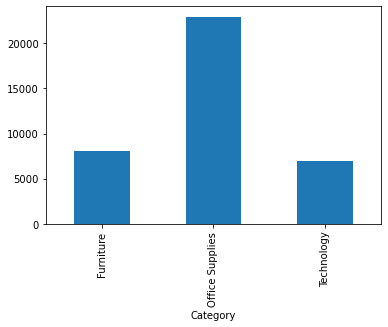

In [64]:
gr5=train.groupby('Category')['Quantity'].agg('sum')
gr5.plot.bar()

In [61]:
print(gr5)

## total sub-category sold in what no

Text(0.5, 1.0, 'Ship Mode Preference')

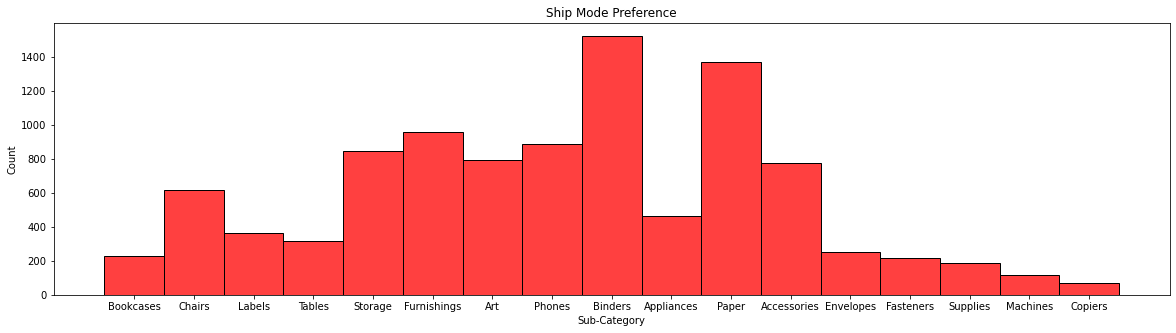

In [76]:
plt.rcParams["figure.figsize"] = (20,5)
sns.histplot(x=train['Sub-Category'], color='r')
plt.title('Ship Mode Preference')


## segment analysis

<AxesSubplot:xlabel='Segment', ylabel='Count'>

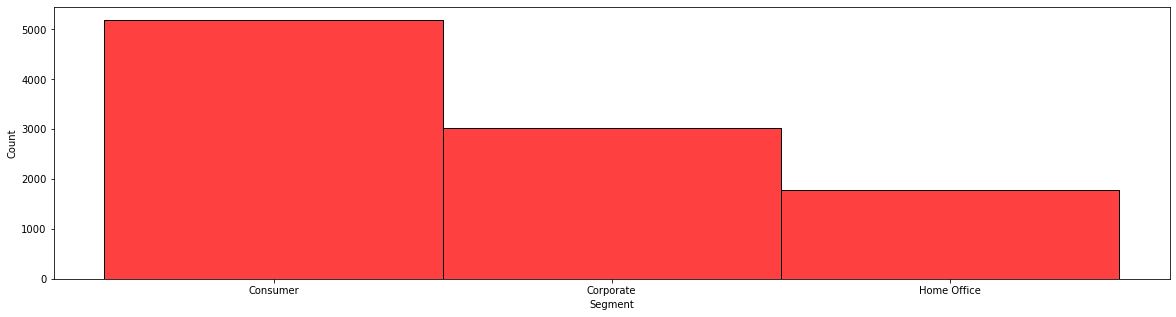

In [77]:
sns.histplot(x=train['Segment'], color='r')


# Thank You